Q1. Explain the difference between linear regression and logistic regression models. Provide an example of
a scenario where logistic regression would be more appropriate.

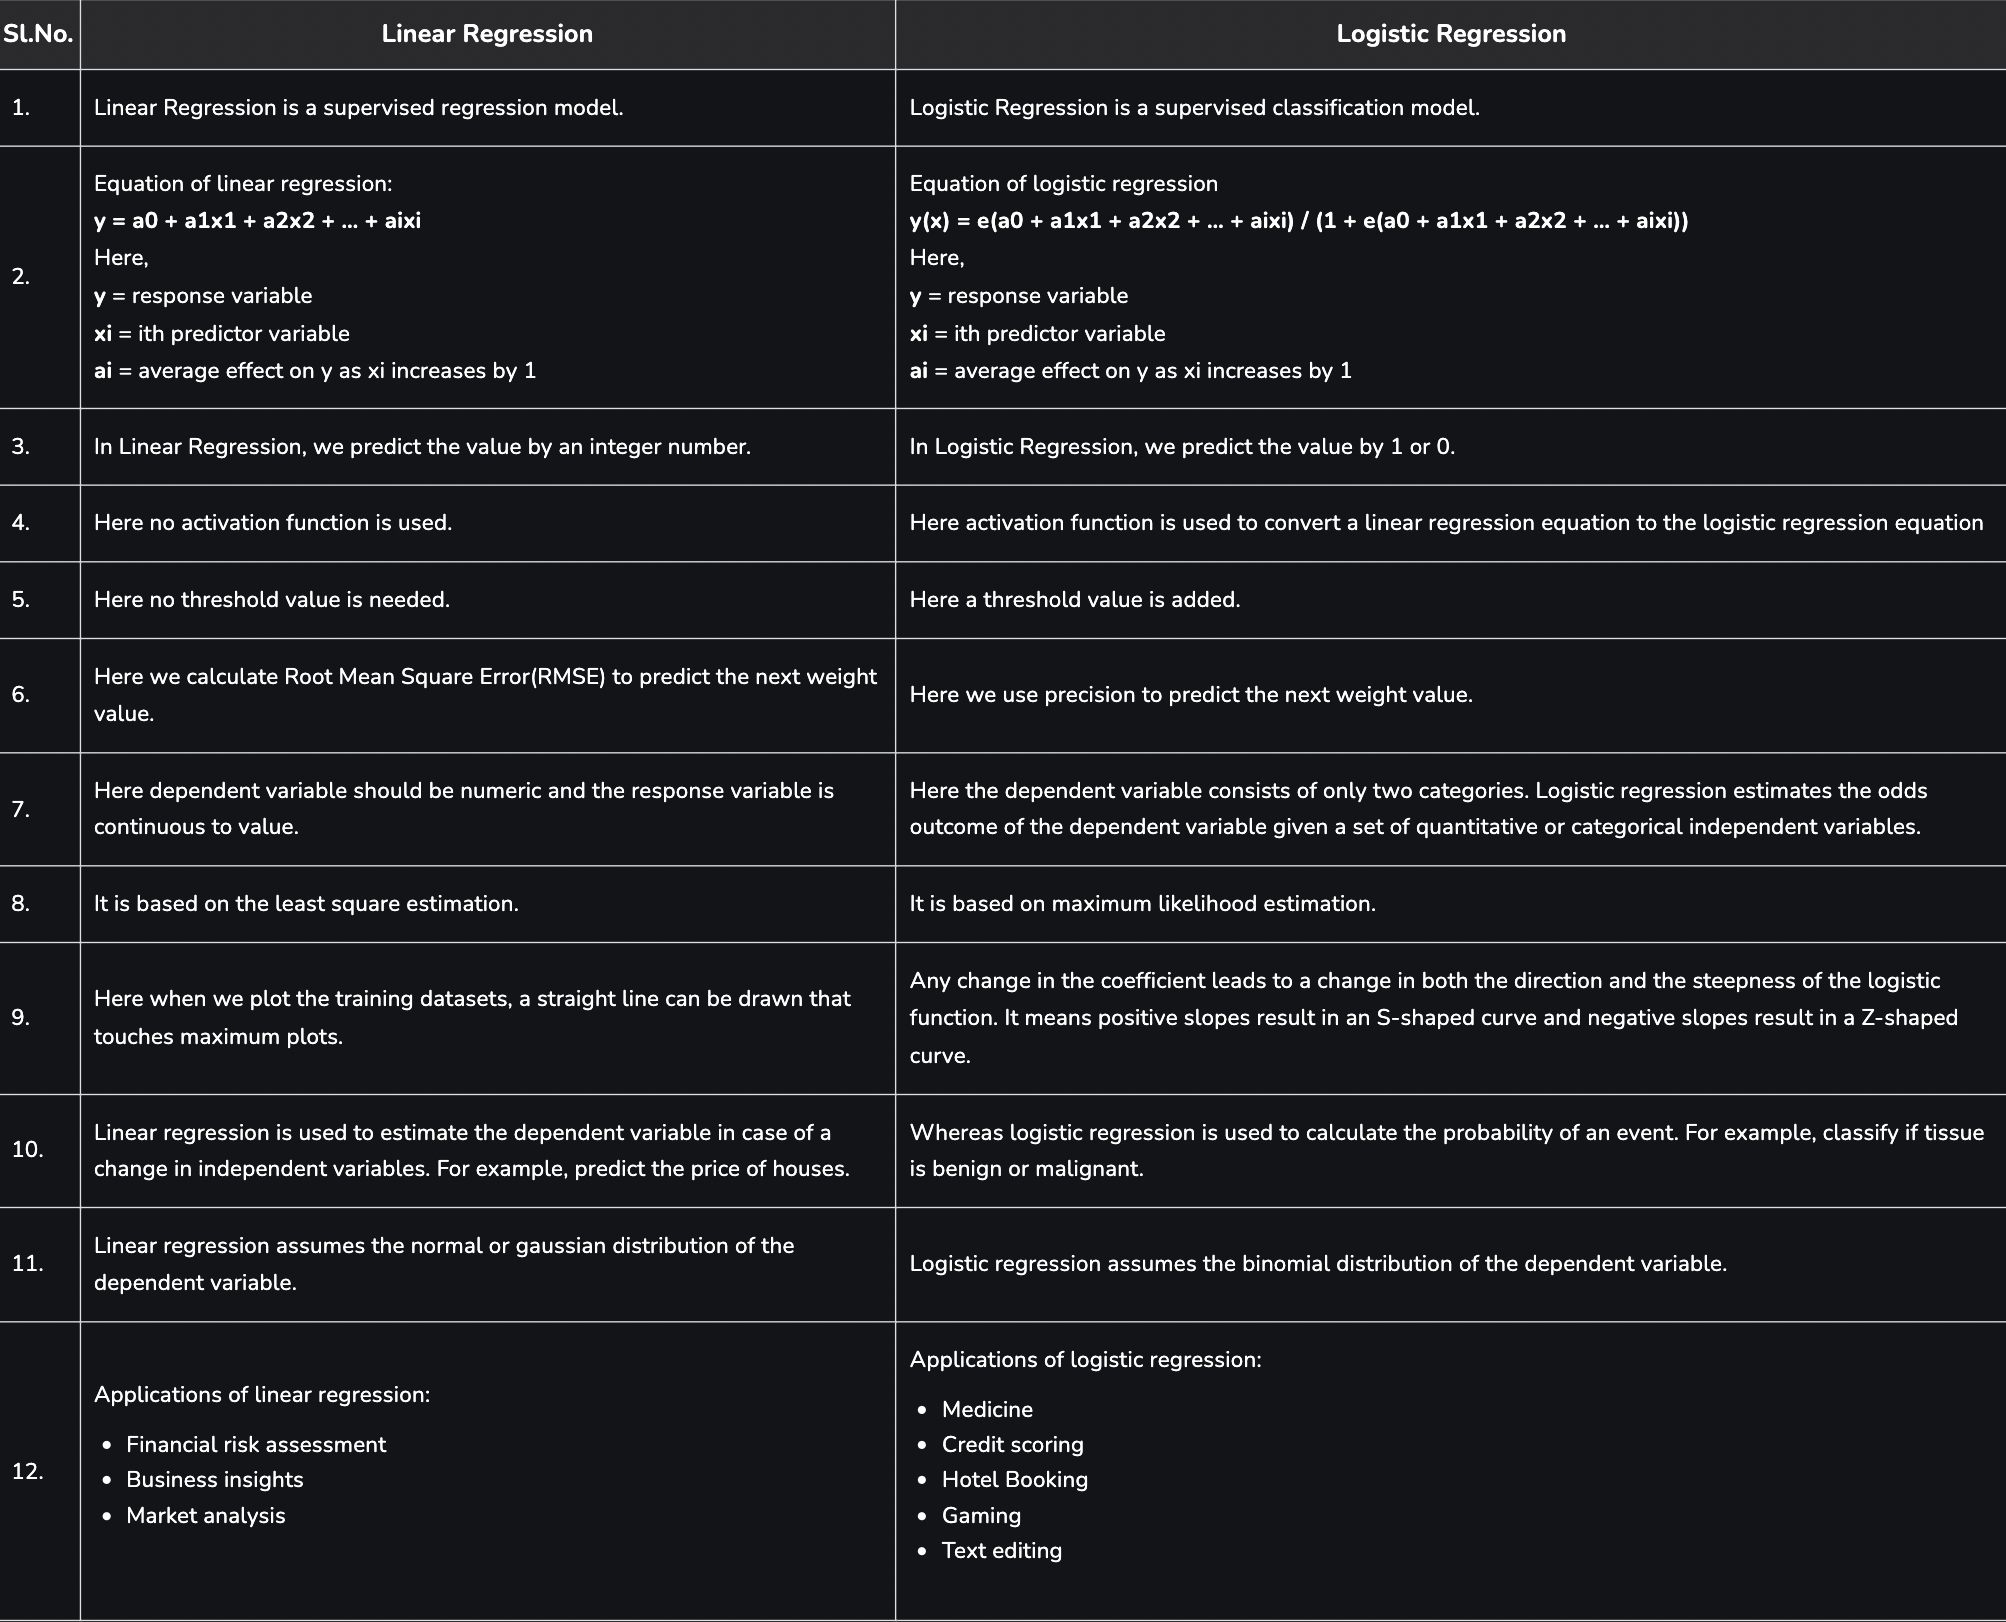

Email Spam Detection
Imagine you are working for an email service provider, and your task is to develop a spam filter that can classify incoming emails as either "spam" or "not spam" (ham). The goal is to automatically move spam emails to a separate spam folder, ensuring that users only see legitimate emails in their main inbox.

In this example,

Dependent Variable (Target): The dependent variable is the classification of an email as either "spam" or "not spam." This is a binary categorical variable.

Independent Variables (Features): You have a set of features for each email that can be used to make the classification decision. These features could include the sender's email address, subject line, the presence of certain keywords, and more. These features can be numeric, categorical, or a combination of both.

Logistic regression would be a suitable choice for this scenario for several reasons:
Binary Classification: The problem involves binary classification, where you want to predict one of two possible outcomes (spam or not spam).

Interpretability: Logistic regression provides interpretable results, making it easy to understand the relationship between the independent variables (email features) and the likelihood of an email being spam.

Efficiency: Logistic regression is computationally efficient and can handle a large number of features and data points, making it well-suited for processing a high volume of incoming emails.

Probability Estimation: Logistic regression also provides probability estimates, which can be useful in ranking emails by their likelihood of being spam. This helps in deciding which emails to prioritize for user review.

Q2. What is the cost function used in logistic regression, and how is it optimized?

In logistic regression, the cost function used is often referred to as the "logistic loss" or "cross-entropy loss" function. It measures the error between the predicted probabilities and the actual binary outcomes (0 or 1). The goal in logistic regression is to minimize this cost function to find the best set of parameters (coefficients) for the model.

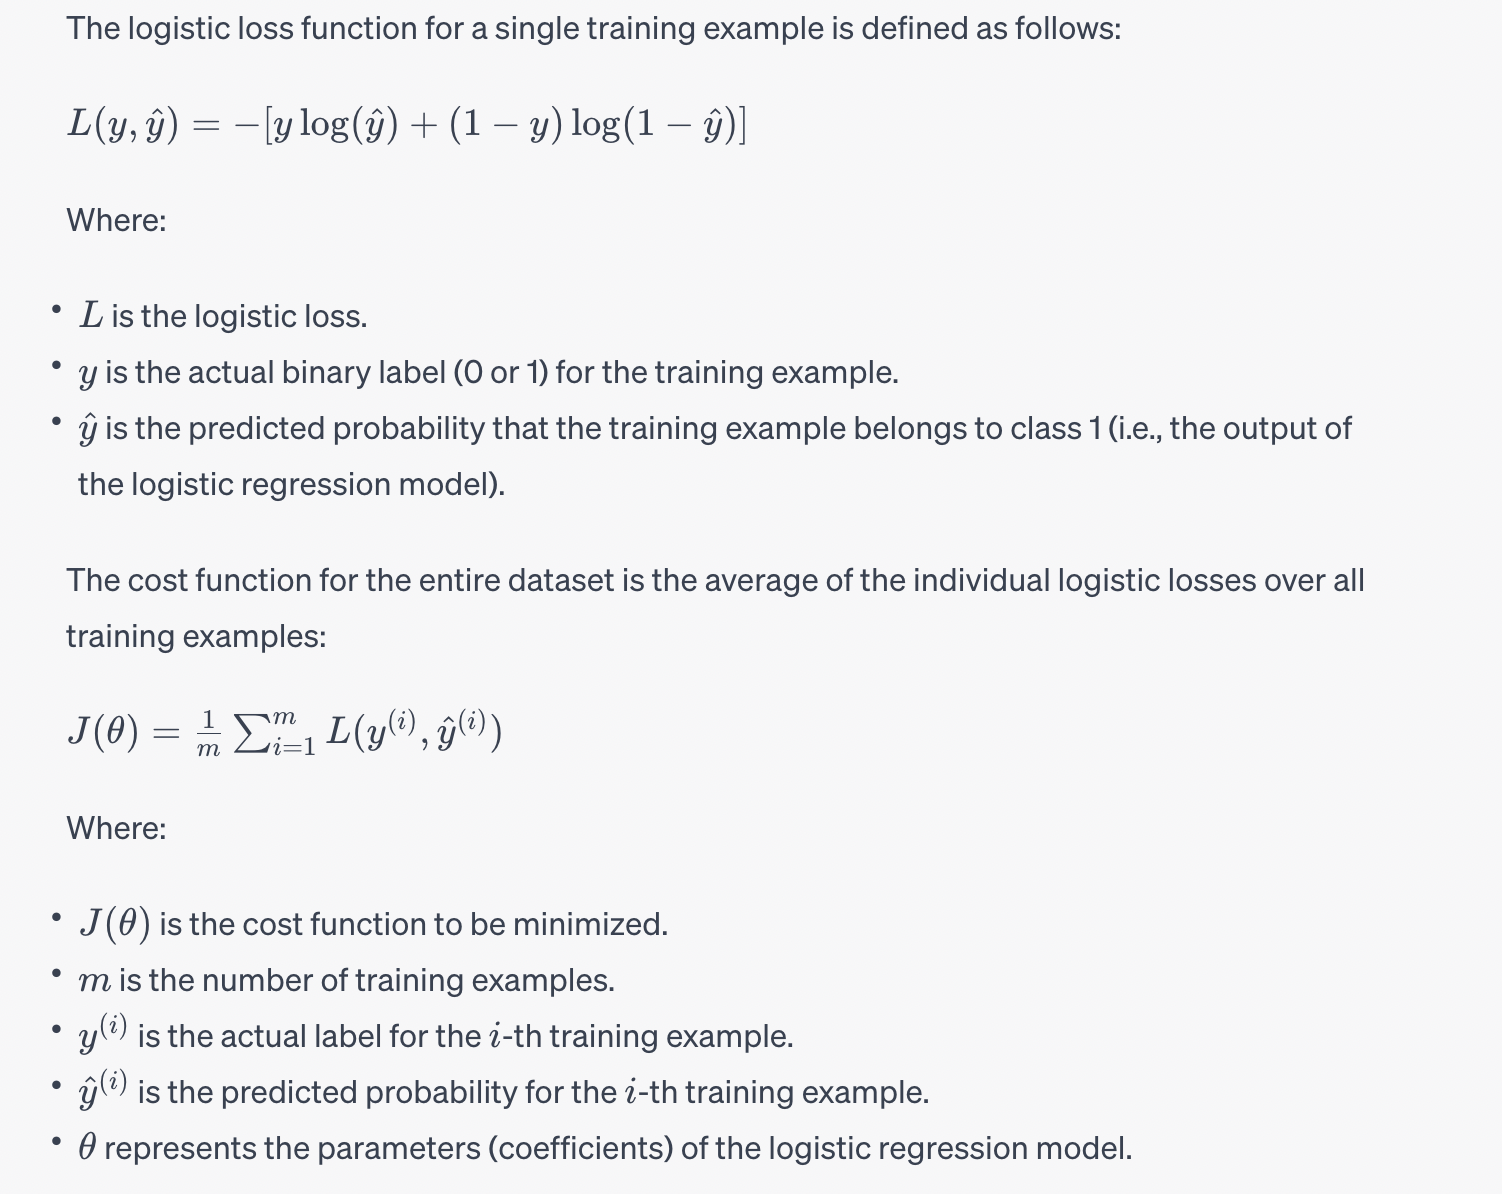

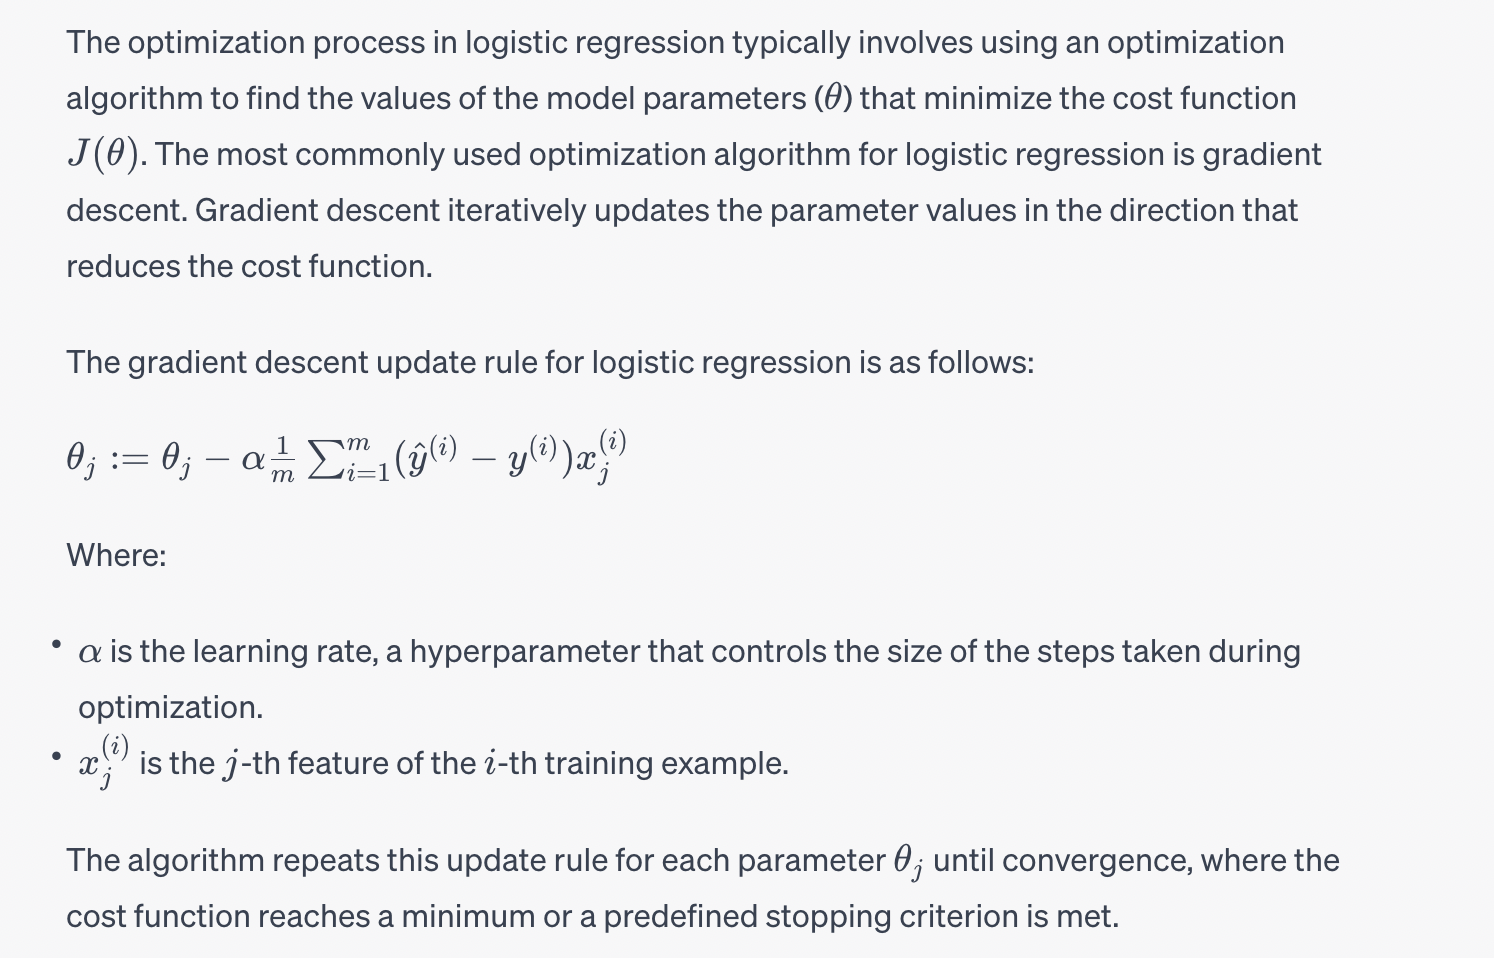

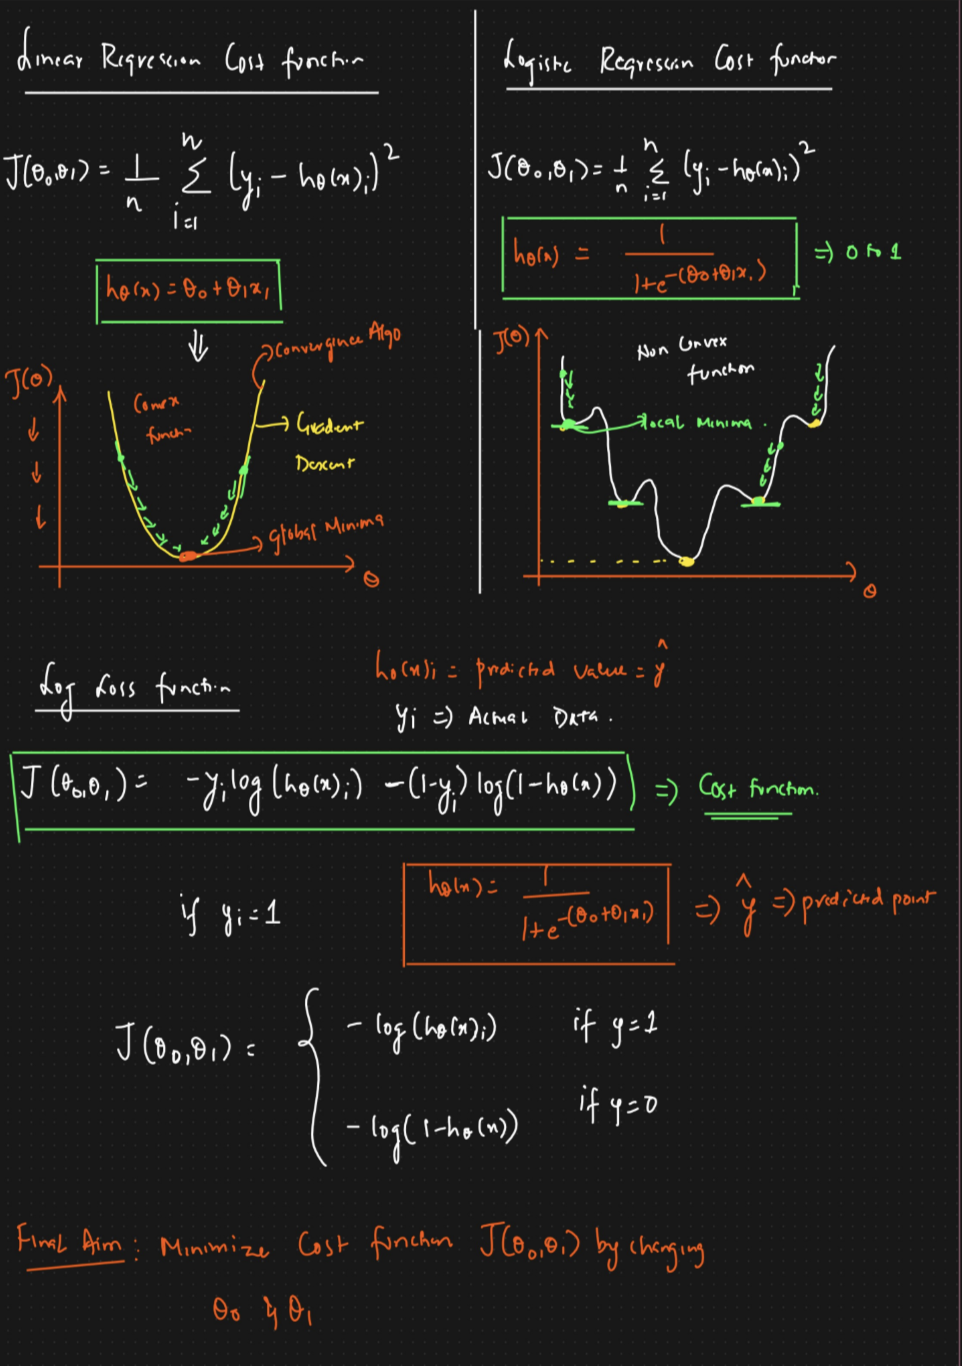

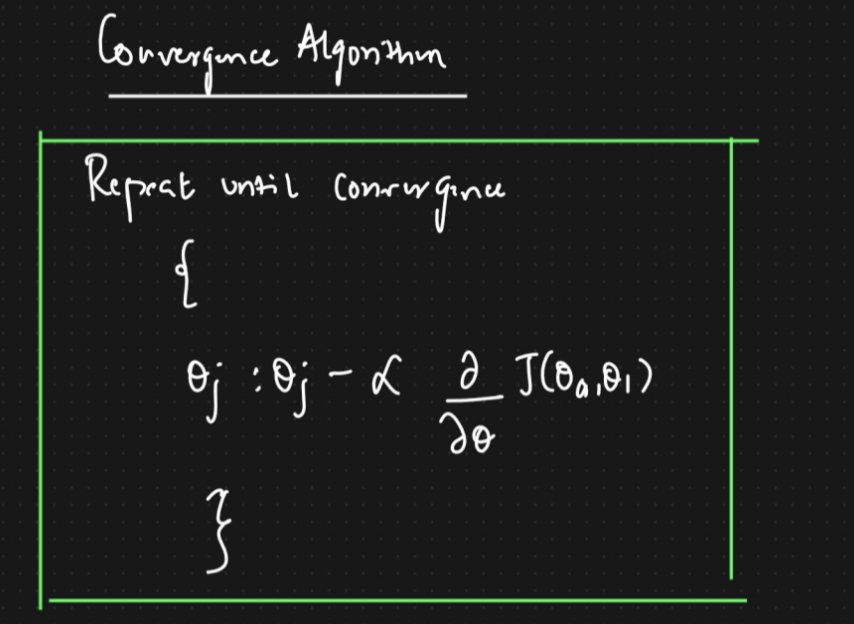

Q3. Explain the concept of regularization in logistic regression and how it helps prevent overfitting.

Regularization is a technique used in logistic regression (and other machine learning models) to prevent overfitting, which occurs when a model fits the training data too closely, capturing noise and making it perform poorly on unseen data. Regularization adds a penalty term to the logistic regression cost function that discourages overly complex models with large coefficient values.

There are two common types of regularization used in logistic regression: L1 regularization (Lasso) and L2 regularization (Ridge).

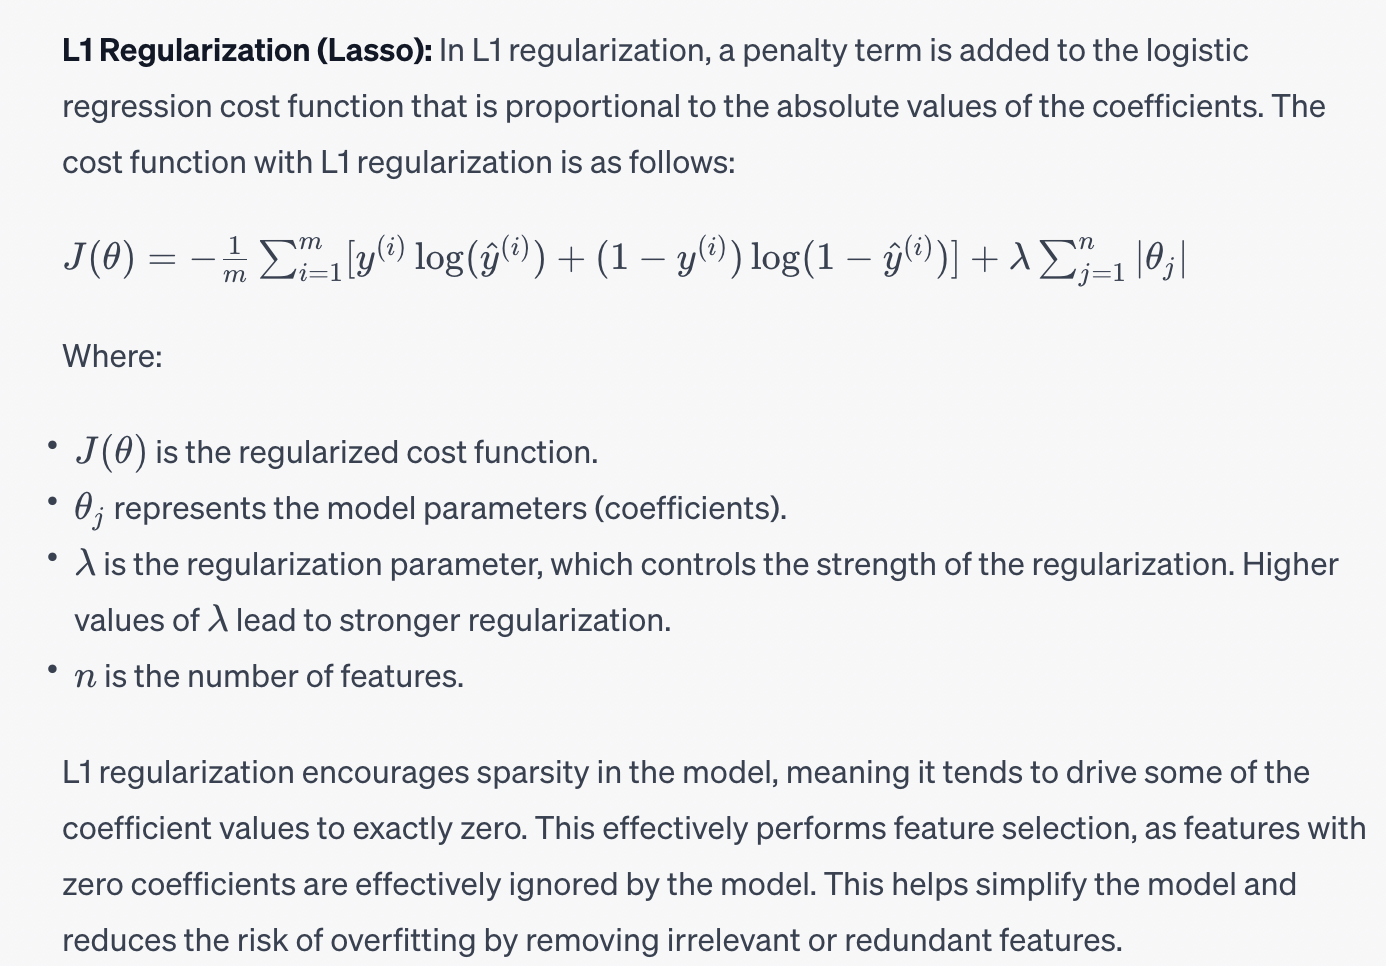

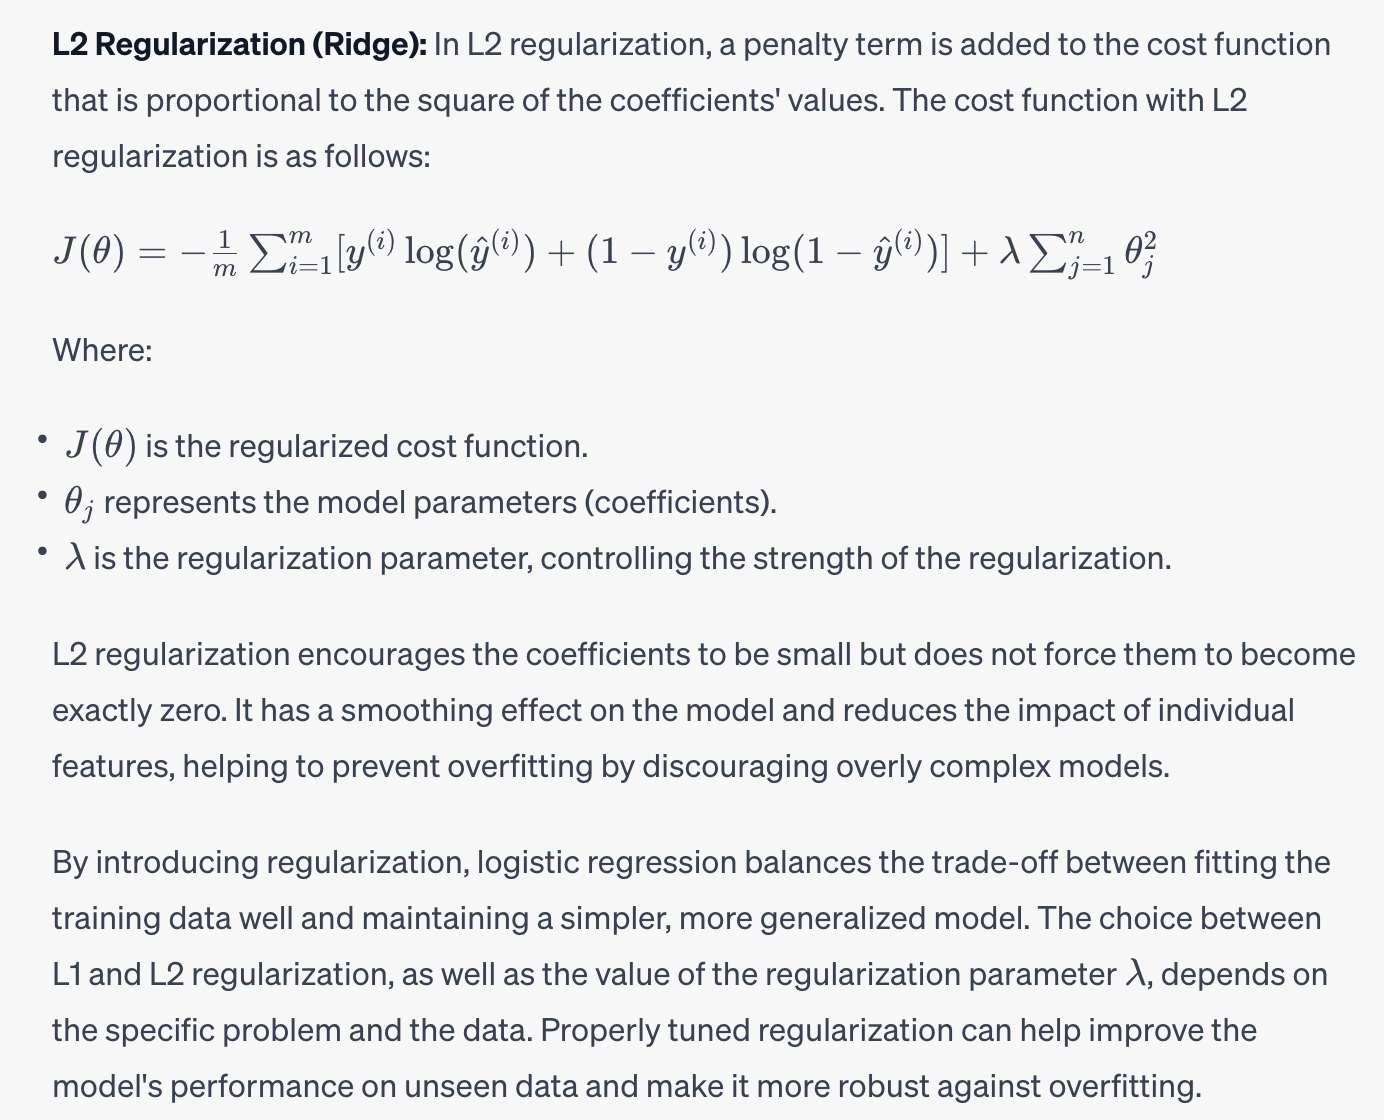

Logistic regression is a supervised learning algorithm for classification that predicts a binary outcome (e.g. yes/no, pass/fail) based on one or more independent variables. It uses a linear combination of the features (predictors) with coefficients (weights) to make predictions.
Overfitting in logistic regression occurs when the model has too many parameters (degrees of freedom) relative to the size of the training data, leading to high training accuracy but low test (or generalization) accuracy.
Regularization is a technique used to avoid overfitting by adding a penalty term to the objective function (loss function) that the model is trying to minimize. This penalty term reduces the complexity of the model and improves its generalization by reducing the variance of the model.
There are several types of regularization that can be used in logistic regression, including L1 (Lasso), L2 (Ridge), and Elastic Net. These types differ in the form of the penalty term and the types of coefficients that they regularize.
To choose the regularization strength (hyperparameter), you can use cross-validation to select the hyperparameter that gives the best performance on the validation set, try a range of values (e.g. 10^-6 to 10⁶) and use a logarithmic scale, or use a grid search to try a range of values for multiple hyperparameters at once.

Q4. What is the ROC curve, and how is it used to evaluate the performance of the logistic regression
model?

AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1. By analogy, the Higher the AUC, the better the model is at distinguishing between patients with the disease and no disease.

The ROC curve is plotted with TPR against the FPR where TPR is on the y-axis and FPR is on the x-axis.



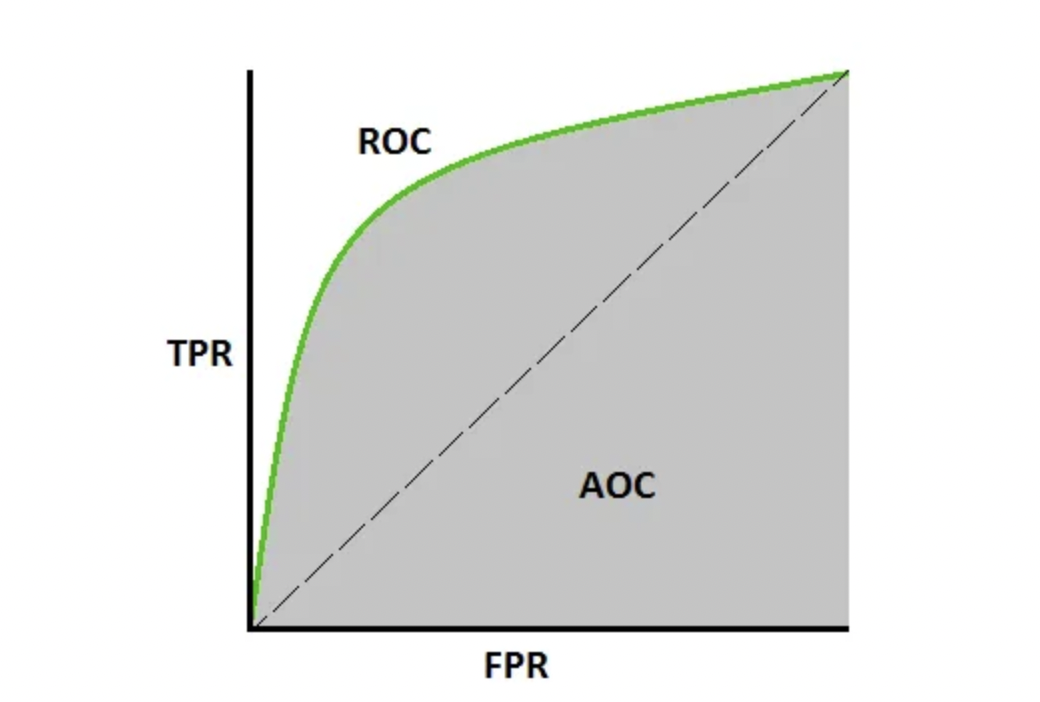

TPR (True Positive Rate) / Recall /Sensitivity = TP / (TP + FN)

Specificity = TN / (TN + FP)

FPR = 1 - Specificity ie,FPR = FP / (FP + TN)

An excellent model has AUC near to the 1 which means it has a good measure of separability. A poor model has an AUC near 0 which means it has the worst measure of separability. In fact, it means it is reciprocating the result. It is predicting 0s as 1s and 1s as 0s. And when AUC is 0.5, it means the model has no class separation capacity whatsoever.

For more reference : https://medium.com/cits-tech/auc-roc-curve-e4bce73fbe53

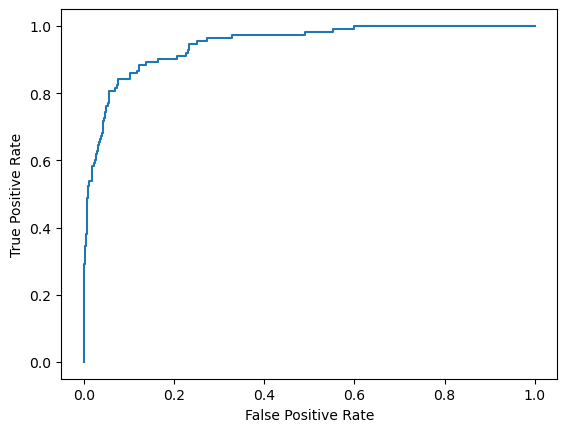

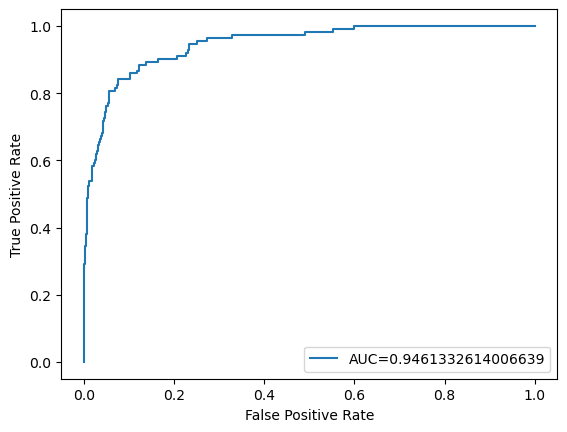

In [9]:
#Step 1:Import modules and fit logistic regression model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

#import dataset from CSV file on Github
url = "https://raw.githubusercontent.com/Statology/Python-Guides/main/default.csv"
data = pd.read_csv(url)

#define the predictor variables and the response variable
X = data[['student', 'balance', 'income']]
y = data['default']

#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

#Step 2: Plot the ROC Curve
#define metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Step 3: Calculate the AUC
#define metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Q5. What are some common techniques for feature selection in logistic regression? How do these
techniques help improve the model's performance?

Feature selection in logistic regression is crucial to improving model performance by reducing overfitting, improving generalization, and enhancing interpretability. Some common techniques for feature selection include:

1. Recursive Feature Elimination (RFE)
What it is: RFE works by recursively removing the least important features and building the model iteratively.
How it helps: It helps in selecting the most important features by eliminating the ones that do not contribute significantly to the prediction, thus simplifying the model and potentially reducing overfitting.
2. L1 Regularization (Lasso)
What it is: Lasso adds a penalty proportional to the absolute value of the coefficients, which can shrink some coefficients to zero, effectively performing feature selection.
How it helps: By shrinking less important feature weights to zero, Lasso eliminates irrelevant or redundant features, which reduces model complexity and improves generalization.
3. Univariate Feature Selection
What it is: This method uses statistical tests (e.g., chi-squared test, ANOVA F-test) to select features based on their relationship with the target variable.
How it helps: It selects features that have the highest correlation with the outcome variable, helping improve the model by focusing only on the most relevant features.
4. Feature Importance from Tree-Based Models
What it is: Logistic regression can use feature importance scores from tree-based models (like Random Forest or Gradient Boosting) to identify and rank important features.
How it helps: Tree-based models can handle non-linear relationships and interactions, providing insights into which features are the most informative. These features can then be used in the logistic regression model for better performance.
5. Variance Threshold
What it is: This technique removes features with low variance, meaning features that don't vary much between observations and are likely not informative.
How it helps: It helps by eliminating features that provide little to no information about the target variable, making the model more efficient.
6. Correlation Matrix with Heatmap
What it is: Identifying highly correlated features using a correlation matrix and heatmap.
How it helps: When features are highly correlated with each other, only one of them should be kept, as including both may lead to multicollinearity, which can negatively affect the model's performance.
7. Backward Elimination
What it is: Start with all features and remove the least significant ones based on p-values from the logistic regression model until only statistically significant features remain.
How it helps: It iteratively removes features that don’t contribute much, leading to a more efficient model that generalizes better.
8. Forward Selection
What it is: Starts with no features and adds features one by one based on a selection criterion, such as the highest improvement in the model's performance.
How it helps: This ensures that only the most useful features are included, which can simplify the model and improve accuracy.
Benefits of Feature Selection in Logistic Regression:
Improved Model Interpretability: With fewer features, it's easier to understand the relationships in the data.
Reduced Overfitting: By eliminating irrelevant features, the model is less likely to fit noise in the training data, leading to better generalization on unseen data.
Increased Training Efficiency: Fewer features result in less computational complexity, allowing the model to train faster.
Better Performance: By focusing on the most informative features, the model can make more accurate predictions.
Each technique can be used based on the dataset, model complexity, and specific problem requirements.









Q6. How can you handle imbalanced datasets in logistic regression? What are some strategies for dealing
with class imbalance?

Handling imbalanced datasets is a critical task in logistic regression, as class imbalance can significantly affect model performance, particularly when the minority class is the focus of interest. Here are several strategies for dealing with class imbalance:

1. Resampling Techniques
Oversampling the Minority Class

What it is: Increase the number of samples in the minority class by duplicating existing examples or generating synthetic examples.
How it helps: Balances the dataset by giving more representation to the minority class, which helps the model learn its characteristics better.
Common methods:
Random Oversampling: Simply duplicates existing minority class samples.
SMOTE (Synthetic Minority Over-sampling Technique): Generates synthetic samples for the minority class by interpolating between neighboring minority class examples.
ADASYN (Adaptive Synthetic Sampling): A variation of SMOTE, it generates more synthetic samples where the data is sparsely populated.
Undersampling the Majority Class

What it is: Reduce the number of samples in the majority class by randomly removing some examples.
How it helps: Helps balance the dataset by reducing the impact of the majority class. It forces the model to focus more on the minority class, though it risks losing valuable information from the majority class.
Common methods:
Random Undersampling: Randomly removes majority class samples.
Tomek Links or NearMiss: Selects samples to remove in a more informed way by focusing on borderline examples.
2. Class Weighting
What it is: Modify the logistic regression algorithm to assign higher weights to the minority class and lower weights to the majority class.
How it helps: By increasing the penalty for misclassifying the minority class, this method allows the model to pay more attention to the minority class without altering the dataset. Most implementations of logistic regression (like sklearn.linear_model.LogisticRegression) have a class_weight parameter, which can be set to balanced to automatically adjust weights inversely proportional to class frequencies.
3. Anomaly Detection Approach
What it is: Treat the minority class as an anomaly detection problem, especially when the minority class is extremely rare.
How it helps: Instead of traditional classification, the model is trained to identify the "normal" class (majority class), and any deviation from it is flagged as a potential instance of the minority class. This works well when the minority class is rare and very distinct from the majority class.
4. Threshold Moving
What it is: Adjust the decision threshold of the logistic regression classifier, which typically defaults to 0.5, to favor the minority class.
How it helps: Instead of classifying a sample as the positive class only if the predicted probability is greater than 0.5, you can lower the threshold. This increases the sensitivity of detecting the minority class at the cost of more false positives.
5. Evaluation Metrics for Imbalanced Data
Why it's important: Accuracy is often misleading in imbalanced datasets, as the model can achieve high accuracy by simply predicting the majority class most of the time. Instead, use metrics that focus on the minority class.
Precision: Measures the proportion of correctly predicted positive observations.
Recall (Sensitivity): Measures the ability of the model to identify the actual positive instances from the dataset.
F1-Score: The harmonic mean of precision and recall, balancing the two.
ROC-AUC Score: Represents the model's ability to distinguish between classes across all threshold levels.
Precision-Recall AUC: Especially useful for highly imbalanced datasets as it focuses on the minority class performance.
6. Ensemble Methods
What it is: Use ensemble techniques such as bagging, boosting, or stacking, which tend to perform well on imbalanced datasets.
How it helps: Methods like Random Forest or Gradient Boosting can handle imbalanced data better by combining predictions from multiple models, often leading to improved minority class detection.
Balanced Random Forest: Balances each decision tree by undersampling the majority class at each iteration.
XGBoost/LightGBM with Class Weighting: These popular boosting methods have built-in functionality for handling class imbalance through sampling strategies or weighting.
7. Generate Synthetic Data (GANs or Variational Autoencoders)
What it is: Use more advanced methods like Generative Adversarial Networks (GANs) or Variational Autoencoders (VAEs) to generate synthetic data for the minority class.
How it helps: GANs or VAEs can model more complex data distributions, providing more realistic synthetic examples to balance the dataset.
8. Cost-Sensitive Learning
What it is: Directly incorporate the cost of misclassification into the learning process. For instance, assign higher penalties for false negatives (i.e., misclassifying a minority class example as the majority class).
How it helps: This approach modifies the objective function of logistic regression, guiding the model to minimize the cost associated with misclassifying minority class examples.
9. Hybrid Methods
What it is: Combine oversampling and undersampling methods to balance the dataset in a more nuanced way.
How it helps: By oversampling the minority class and undersampling the majority class, hybrid methods balance the dataset without causing overfitting or losing important information from the majority class.
In summary:
Resampling (oversampling/undersampling) and class weighting are the most commonly used strategies in logistic regression for handling imbalanced data.
Evaluating performance using appropriate metrics like F1-score, ROC-AUC, or Precision-Recall AUC ensures that the model's effectiveness for the minority class is properly assessed.
Advanced techniques, such as SMOTE or GANs, can be explored for more complex datasets.

Q7. Can you discuss some common issues and challenges that may arise when implementing logistic
regression, and how they can be addressed? For example, what can be done if there is multicollinearity
among the independent variables?

When implementing logistic regression, several common issues and challenges can arise that may affect the model’s performance and interpretability. Below are some of these issues along with strategies to address them:

### 1. **Multicollinearity**
   - **Issue**: Multicollinearity occurs when two or more independent variables are highly correlated, leading to unstable coefficient estimates, inflated standard errors, and difficulty in interpreting the effect of individual variables.
   - **How to Address**:
     - **Remove Highly Correlated Features**: Use a correlation matrix or VIF (Variance Inflation Factor) to identify and remove one of the highly correlated features.
     - **Regularization (L1 or L2 Penalty)**: Regularization techniques such as L1 (Lasso) or L2 (Ridge) can help reduce the impact of multicollinearity by shrinking the coefficients of less important features, stabilizing the model.
     - **Principal Component Analysis (PCA)**: Transform the correlated features into a smaller set of uncorrelated components.
     - **Domain Knowledge**: If possible, rely on domain knowledge to drop or combine redundant features.

### 2. **Overfitting**
   - **Issue**: Overfitting occurs when the model learns not only the underlying pattern in the data but also the noise, leading to poor generalization on new data.
   - **How to Address**:
     - **Regularization**: Use L2 (Ridge) or L1 (Lasso) regularization to penalize large coefficients, reducing the risk of overfitting by encouraging simpler models.
     - **Cross-Validation**: Use k-fold cross-validation to tune hyperparameters and ensure that the model generalizes well across different subsets of the data.
     - **Feature Selection**: Reduce the number of input features by removing irrelevant or redundant variables using techniques like Recursive Feature Elimination (RFE) or domain knowledge.
     - **Simplify the Model**: Avoid using overly complex feature engineering, especially when dealing with small datasets.

### 3. **Underfitting**
   - **Issue**: Underfitting happens when the model is too simplistic to capture the underlying patterns in the data, leading to poor performance on both training and test sets.
   - **How to Address**:
     - **Add More Relevant Features**: Incorporate more informative variables to improve the model’s ability to learn.
     - **Model Complexity**: Consider adding interaction terms or polynomial features to better capture non-linear relationships.
     - **Reduce Regularization**: If regularization is too strong (large penalty), it might overly constrain the model. Reduce the regularization parameter (`C` in logistic regression) to allow the model more flexibility.

### 4. **Class Imbalance**
   - **Issue**: Logistic regression can struggle when the dataset is imbalanced, meaning one class is much more frequent than the other(s), leading to biased predictions toward the majority class.
   - **How to Address**:
     - **Resampling Techniques**: Use oversampling (e.g., SMOTE) to balance the dataset by generating more samples of the minority class, or undersampling to reduce the majority class.
     - **Class Weighting**: Adjust the class weights in logistic regression by setting the `class_weight` parameter to `balanced`, which assigns weights inversely proportional to class frequencies.
     - **Threshold Tuning**: Adjust the decision threshold for the minority class to favor more positive predictions.

### 5. **Non-Linearity**
   - **Issue**: Logistic regression assumes a linear relationship between the independent variables and the log-odds of the outcome. If the relationship is non-linear, the model may not perform well.
   - **How to Address**:
     - **Feature Engineering**: Create interaction terms, polynomial features, or use non-linear transformations of the predictors (e.g., log, square root) to capture the non-linear relationships.
     - **Switch to a Non-Linear Model**: If the relationships are highly non-linear, consider using more flexible models like decision trees, random forests, or gradient boosting methods.

### 6. **Outliers**
   - **Issue**: Outliers in the independent variables can disproportionately influence the model’s coefficients, leading to biased or unstable estimates.
   - **How to Address**:
     - **Identify and Remove Outliers**: Use methods like the Z-score or IQR (Interquartile Range) to detect and remove or transform outliers.
     - **Robust Logistic Regression**: Use robust regression techniques that are less sensitive to outliers.
     - **Cap and Floor Outliers**: Limit the range of extreme values using capping (setting a maximum value) or flooring (setting a minimum value).

### 7. **Convergence Issues**
   - **Issue**: Logistic regression may fail to converge when the data is poorly conditioned or when the classes are perfectly separable.
   - **How to Address**:
     - **Check for Perfect Separation**: Perfect separation occurs when one class can be perfectly predicted by a single feature or a combination of features. In this case, logistic regression won’t converge. Remove the feature(s) causing perfect separation or apply regularization.
     - **Standardize Features**: Scale the features to have zero mean and unit variance, which can improve convergence in some cases, especially when the features have vastly different scales.
     - **Increase Maximum Iterations**: Increase the `max_iter` parameter in your logistic regression model to allow the solver more time to converge.
     - **Change the Solver**: Some solvers (e.g., `lbfgs`, `sag`, `saga`) may converge better with certain types of data. Experiment with different solvers to find one that works for your dataset.

### 8. **High Dimensionality**
   - **Issue**: Logistic regression may perform poorly when the number of features is much larger than the number of observations (e.g., text data with thousands of features), leading to overfitting and poor generalization.
   - **How to Address**:
     - **Dimensionality Reduction**: Use techniques such as Principal Component Analysis (PCA) or Feature Selection to reduce the number of input features.
     - **Regularization**: Apply L1 (Lasso) regularization to encourage sparsity in the feature space by zeroing out irrelevant features.
     - **Feature Engineering**: Combine or remove features to reduce the dimensionality before feeding them into the model.

### 9. **Imbalanced Cost of Misclassification**
   - **Issue**: In some cases, the cost of misclassifying one class (e.g., false negatives) may be much higher than the other class (e.g., false positives).
   - **How to Address**:
     - **Class Weights**: Assign different weights to the classes using the `class_weight` parameter, which penalizes the misclassification of the minority class more heavily.
     - **Cost-Sensitive Learning**: Incorporate cost-sensitive algorithms that directly optimize for the cost of misclassification rather than accuracy.

### 10. **Interpretability**
   - **Issue**: Interpreting logistic regression models can be difficult when there are many features, interactions, or complex data transformations.
   - **How to Address**:
     - **Feature Selection**: Reduce the number of features using feature selection techniques to improve interpretability.
     - **Standardize Coefficients**: Standardize the features so that the coefficients become comparable in magnitude.
     - **Simplify the Model**: Focus on the most relevant features or interactions that contribute to the predictions.

### Conclusion:
Addressing these common issues in logistic regression involves understanding the data, tuning the model, and applying appropriate techniques (e.g., regularization, resampling, feature engineering) to improve performance. Recognizing potential challenges early can lead to better, more robust models with improved generalization.